In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# 한글 폰트 문제 해결
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

# 워닝 메시지 무시
import warnings
warnings.filterwarnings(action='ignore')

# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

- koweps_visualization.xlsx [실습]

In [3]:
koweps_frm = pd.read_excel('./data/visualization_data/koweps_visualization.xlsx')
koweps_frm

,h12_id,h12_ind,h12_sn,h12_merkey,h_new,h12_cobf,p12_wgl,p12_wsl,p12_wgc,p12_wsc,...,da12_326,da12_327,da12_328,da12_6aq14,da12_6aq15,h12_pers_income1,h12_pers_income2,h12_pers_income3,h12_pers_income4,h12_pers_income5
0,1,1,1,10101,0,NaN,953.482054,0.286943,948.140524,0.285336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,2,1,1,20101,0,NaN,1238.891352,0.372835,1238.891352,0.372835,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,3,1,1,30101,0,NaN,1282.051947,0.385824,1282.051947,0.385824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,4,1,1,40101,0,NaN,1066.327201,0.320903,1066.327201,0.320903,...,NaN,NaN,NaN,NaN,NaN,NaN,3418.0,NaN,0,NaN
4,4,1,1,40101,0,NaN,1390.617192,0.418496,1382.826774,0.416151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15417,9800,7,1,98000701,1,NaN,735.488155,0.221339,735.488155,0.221339,...,NaN,NaN,NaN,NaN,NaN,NaN,979.0,NaN,0,NaN
15418,9800,7,1,98000701,1,NaN,898.395613,0.270365,898.395613,0.270365,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
15419,9800,7,1,98000701,1,NaN,2686.353997,0.808438,2676.190322,0.805379,...,NaN,NaN,NaN,NaN,NaN,NaN,868.0,NaN,0,NaN
15420,9800,7,1,98000701,1,NaN,841.651153,0.253288,841.651153,0.253288,...,NaN,NaN,NaN,NaN,NaN,NaN,518.0,NaN,0,NaN


In [4]:
koweps = koweps_frm.copy()

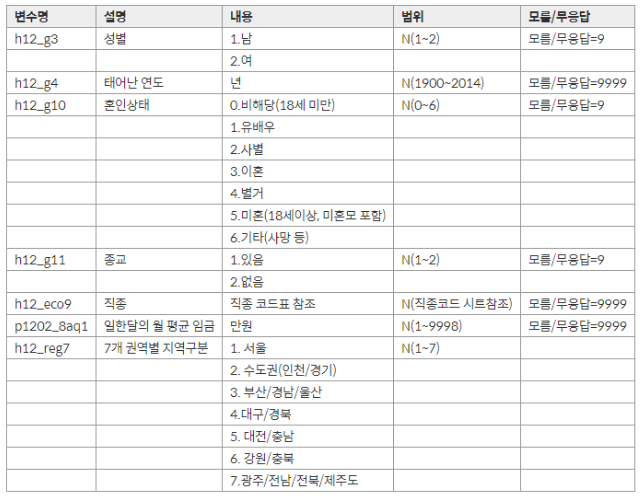

In [5]:
from IPython.display import Image
Image('./data/visualization_data/실습이미지.png', width = 700)

In [60]:
koweps_subset = koweps[['h12_g3','h12_g4','h12_g10','h12_g11','h12_eco9','p1202_8aq1','h12_reg7']]
koweps_subset.rename(columns = {'h12_g3':'성별', 'h12_g4':'태어난 연도', 'h12_g10':'혼인상태',
                               'h12_g11':'종교','h12_eco9':'직종','p1202_8aq1':'일한달의 월 평균 임금',
                               'h12_reg7':'7개 권역별 지역구분'}, inplace = True)
koweps_subset

,성별,태어난 연도,혼인상태,종교,직종,일한달의 월 평균 임금,7개 권역별 지역구분
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,NaN,NaN,1
3,1,1942,3,1,762.0,108.9,1
4,2,1923,2,1,NaN,NaN,1
...,...,...,...,...,...,...,...
15417,2,1967,1,1,952.0,NaN,5
15418,2,1992,5,1,NaN,NaN,5
15419,1,1995,5,1,521.0,72.0,5
15420,2,1998,5,1,432.0,NaN,5


In [12]:
# 데이터 분석
# 성별의 데이터 분포 확인
# 성별을 비율순으로 정렬
# 데이터 시각화
subset_koweps['성별'].value_counts()

2    8440
1    6982
Name: 성별, dtype: int64

<AxesSubplot:>

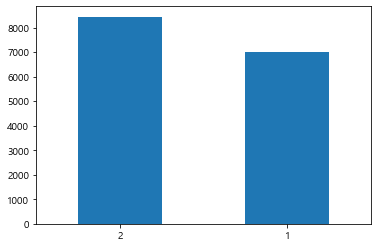

In [14]:
subset_koweps['성별'].value_counts().plot(kind='bar', rot = 0)

In [22]:
# 성별을 남, 여 변경한 성별2 컬럼 새로 만들기, 시각화
subset_koweps['성별2'] = subset_koweps['성별'].apply(lambda x : '남자' if x == 1 else '여자')
subset_koweps.head()

,성별,태어난 연도,혼인상태,종교,직종,일한달의 월 평균 임금,7개 권역별 지역구분,성별2
0,2,1936,2,2,NaN,NaN,1,여자
1,2,1945,2,2,NaN,NaN,1,여자
2,1,1948,2,2,NaN,NaN,1,남자
3,1,1942,3,1,762.0,108.9,1,남자
4,2,1923,2,1,NaN,NaN,1,여자


In [24]:
# np.where(): 조건에 만족하는 인덱스만 반환
subset_koweps['성별3'] = np.where(subset_koweps['성별'] == 1 , '남자', '여자')
subset_koweps.head()

,성별,태어난 연도,혼인상태,종교,직종,일한달의 월 평균 임금,7개 권역별 지역구분,성별2,성별3
0,2,1936,2,2,NaN,NaN,1,여자,여자
1,2,1945,2,2,NaN,NaN,1,여자,여자
2,1,1948,2,2,NaN,NaN,1,남자,남자
3,1,1942,3,1,762.0,108.9,1,남자,남자
4,2,1923,2,1,NaN,NaN,1,여자,여자


<AxesSubplot:>

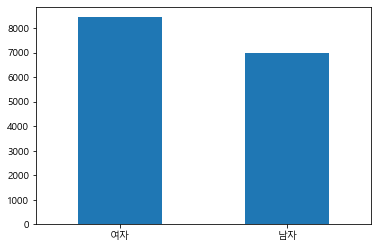

In [25]:
subset_koweps['성별3'].value_counts().plot(kind='bar', rot=0)

In [27]:
# 성별 분포에 따른 시각화 - bar
gender_frm = pd.DataFrame(subset_koweps['성별3'].value_counts())
gender_frm.rename(columns = {'성별3': '명'}, inplace=True)
gender_frm

,명
여자,8440
남자,6982


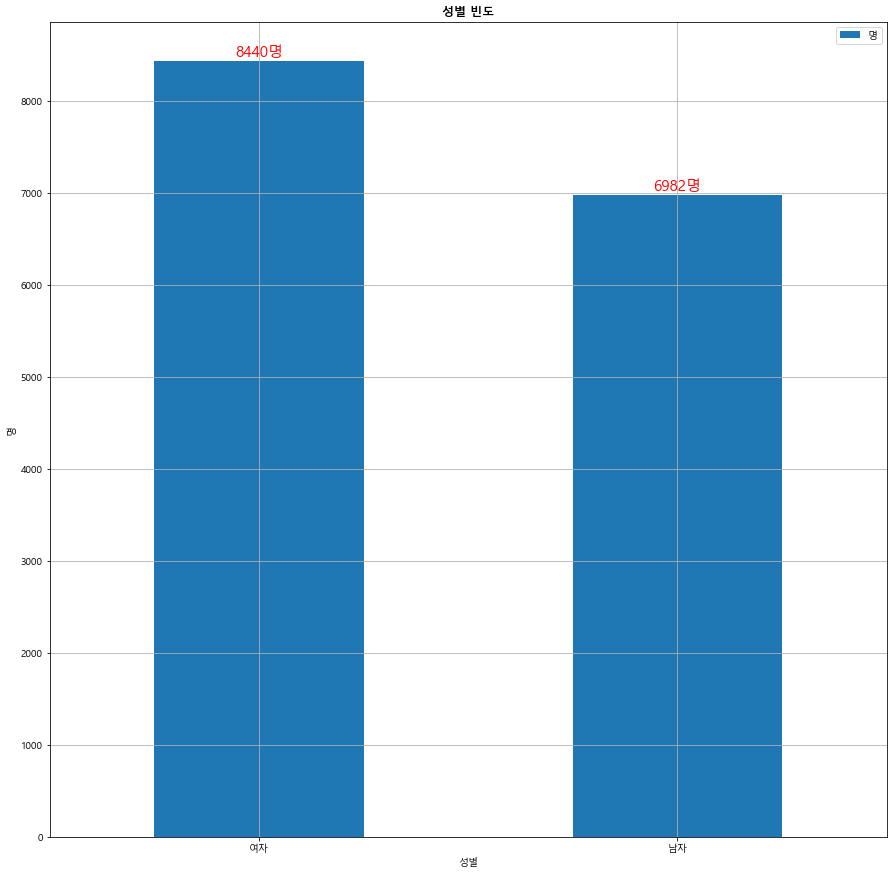

In [34]:
gender_frm.plot(kind='bar', rot=0, figsize=(15,15))

plt.grid()
plt.title('성별 빈도', weight='bold')
plt.xlabel('성별')
plt.ylabel('명')

for idx, cnt in enumerate(list(gender_frm['명'])):
    plt.text(idx, cnt, '%d명' % cnt,
            horizontalalignment = 'center',
            verticalalignment = 'bottom',
            fontsize = 15,
            color = 'red')
    
    
plt.show()
plt.close()

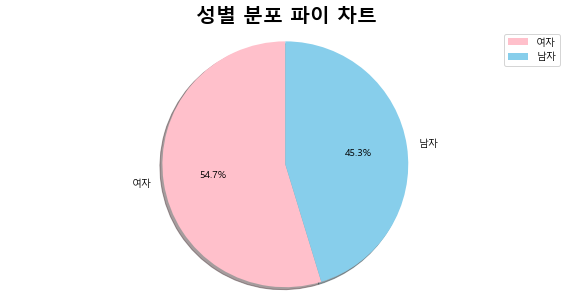

In [42]:
# 성별 분포에 따른 시각화 - pie

plt.figure(figsize=(10,5))
plt.pie(gender_frm['명'], labels = gender_frm.index,
       autopct = '%1.1f%%',
       colors = ['pink', 'skyblue'], shadow = True,
       startangle = 90)

plt.title('성별 분포 파이 차트', size = 20, weight = 'bold')
plt.legend(loc='best')
plt.axis('equal')

plt.show()
plt.close()

In [37]:
gender_frm.values

array([[8440],
       [6982]], dtype=int64)

#### 성별에 따른 평균 급여 차이 분석
- 성별과 월급 데이터만 추출
- 성별을 남자, 여자로 변환
- 데이터 정제(결측값, 결측값 제거, 이상치 결측값으로 대체하고 제거)
- 시각화


In [50]:
sex_salary_subset = subset_koweps[['성별','일한달의 월 평균 임금']]
sex_salary_subset['성별'] = sex_salary_subset['성별'].apply(lambda x : '남자' if x == 1 else '여자')
sex_salary_subset.dropna(inplace=True)
sex_salary_subset.isnull().sum()

성별              0
일한달의 월 평균 임금    0
dtype: int64

<AxesSubplot:>

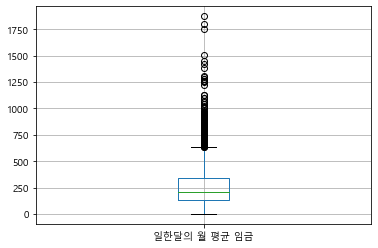

In [57]:
sex_salary_subset.boxplot()

In [52]:
iqr = sex_salary_subset.quantile(q=0.75) - sex_salary_subset.quantile(q=0.25)
upper = sex_salary_subset.quantile(q=0.75) + 1.5 * iqr

In [55]:
sex_salary_subset['일한달의 월 평균 임금'][sex_salary_subset['일한달의 월 평균 임금'] > upper['일한달의 월 평균 임금']]

76        841.0
80        691.0
133      1800.0
175       693.0
244       758.0
          ...  
14970     641.0
15019     952.0
15195     654.0
15292     842.0
15378     704.0
Name: 일한달의 월 평균 임금, Length: 207, dtype: float64

In [1]:

# 이상치 - lower fence, upper fence
lower =  quantile25 - 1.5 * iqr
print('lower fence - ', lower)
upper = quantile75 + 1.5 * iqr
print('upper fence - ', upper)
print()

# 극단치 경계 값 (아래 수평선, 위 수평선)
lower_outlier = gender_salary_subset[gender_salary_subset > lower].min()
print('lower outlier - ', lower_outlier)

upper_outlier = gender_salary_subset[gender_salary_subset < upper].max()
print('upper outlier - ', upper_outlier)
print()

# 이상치 데이터 추출
gender_salary_subset_outlier = gender_salary_subset[gender_salary_subset['일한달의 평균 임금'] > upper_outlier['일한달의 평균 임금']]
display(gender_salary_subset)
print()

gender_salary_subset_outli
# 이상치를 결측값으로 변
# 결측값 있는지 확인
# 결측값 제거
gender_salary_subset.dropna(inplace= True)
print()
# 결측값 제거 확인
print(gender_salary_subset.isnull().sum())
# 시각화 -성별에 따른 평균 급여 차이를 분석 
gender_wage = gender_salary_subset.groupby('성별')['일한달의 평균 임금'].mean()
gender_wage.plot(kind='bar', rot = 0)

plt.title('성별에 따른 평균 급여 차이')
plt.xlabel('성별')
plt.ylabel('평균 급여(단위: 만원)')
plt.legend(loc = 'best')

plt.show()
plt.close()


NameError: name 'quantile25' is not defined

#### 나이에 따른 평균 급여 변화
- 데이터 전처리(태어난 년도, 월급에 대한 컬럼 추출, 나이를 계산하여 파생변수 추가)
- 데이터 정제(결측값 확인, 결측값 제거, 이상치 결측 처리)
- 데이터 분석(나이별 따른 급여평균)
- 데이터 시각화



In [77]:
year_salary_subset = koweps_subset[['태어난 연도', '일한달의 월 평균 임금']]

import datetime as date
year_salary_subset['나이'] = date.datetime.now().year - year_salary_subset['태어난 연도'] +1
# year_salary_subset['나이'] = 2022 - year_salary_subset['태어난 연도'] + 1

In [78]:
year_salary_subset.dropna(inplace=True)

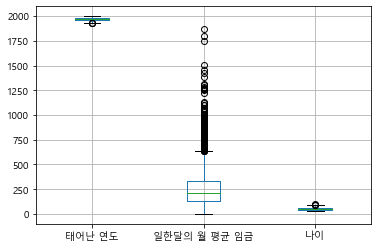

In [79]:
year_salary_subset.boxplot()

plt.show()
plt.close()

In [83]:
result_frm = year_salary_subset[['나이', '일한달의 월 평균 임금']].groupby('나이').mean()
result_frm.head()

,일한달의 월 평균 임금
나이,
25,89.333333
26,136.720000
27,140.807692
28,138.000000
29,145.652000


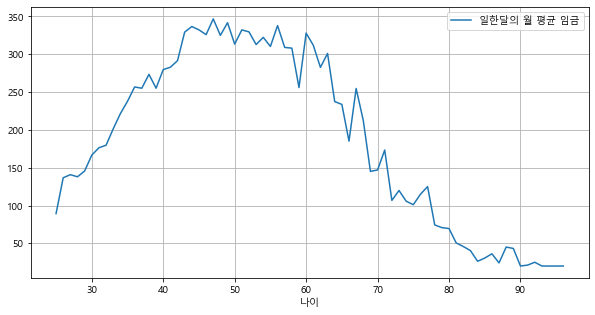

In [85]:
result_frm.plot(figsize=(10,5))

plt.grid()
plt.show()
plt.close()

- 연령대에 따른 분포


In [87]:
year_salary_subset['연령대'] = (year_salary_subset['나이'] // 10) *10
year_salary_subset

,태어난 연도,일한달의 월 평균 임금,나이,연령대
3,1942,108.9,81,80
10,1940,20.0,83,80
16,1978,322.0,45,40
17,1975,120.0,48,40
24,1975,300.0,48,40
...,...,...,...,...
15400,1966,230.0,57,50
15401,1962,138.0,61,60
15404,1993,286.0,30,30
15412,1956,179.0,67,60


In [88]:
year_salary_subset['연령대'].value_counts()

50    1159
40    1110
60     767
30     748
70     371
80     205
20     134
90      13
Name: 연령대, dtype: int64

In [89]:
year_salary_subset.isnull().sum()

태어난 연도          0
일한달의 월 평균 임금    0
나이              0
연령대             0
dtype: int64

In [90]:
result_frm = pd.DataFrame( year_salary_subset['연령대'].value_counts())
result_frm

,연령대
50,1159
40,1110
60,767
30,748
70,371
80,205
20,134
90,13


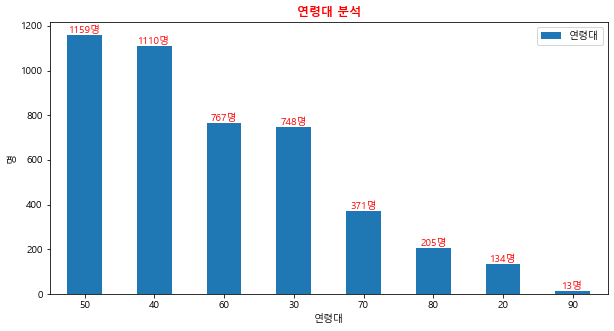

In [97]:
result_frm.plot(kind = 'bar', figsize=(10,5), rot = 0)

plt.title('연령대 분석', weight = 'bold', color = 'red')
plt.xlabel('연령대')
plt.ylabel('명')
plt.legend(loc = 'best')


for idx, value in enumerate(list(result_frm['연령대'])):
    txt = '%d명' % value
    plt.text(idx, value, txt,
            horizontalalignment = 'center',
            verticalalignment = 'bottom',
            fontsize = 10,
            color = 'red')

plt.show()
plt.close()

- 연령대별 평균 급여 변화

성별과 연령대 분포 

성별과 연령대에 따른 평균 급여 변화

지역별 연령층 분포와 연령층별 지역비율


In [104]:
# 이상치 - IQR
IQR = year_salary_subset['일한달의 월 평균 임금'].quantile(q=0.75) - year_salary_subset['일한달의 평균 임금'].quantile(q=0.25)
print('IQR - ', IQR)
# 이상치 - lower fence, upper fence
lower =  year_salary_subset['일한달의 월 평균 임금'].quantile(q=0.25) - 1.5*IQR
print('lower fence - ', lower)
upper = year_salary_subset['일한달의 월 평균 임금'].quantile(q=0.75) + 1.5*IQR 
print('upper fence - ', upper)
print()


KeyError: '일한달의 평균 임금'

In [105]:
# 극단치 경계 값 (아래 수평선, 위 수평선)
lower_outlier = year_salary_subset[year_salary_subset > lower].min()
print('lower outlier - ', lower_outlier['일한달의 월 평균 임금'])

upper_outlier = year_salary_subset[year_salary_subset < upper].max()
print('upper outlier - ', upper_outlier['일한달의 월 평균 임금'])
print()


lower outlier -  0.0
upper outlier -  634.0



In [108]:
# 이상치 데이터 추출
koweps_age_outlier = year_salary_subset[year_salary_subset['일한달의 월 평균 임금'] > upper_outlier['일한달의 월 평균 임금']]
display(koweps_age_outlier)
print()

# 이상치를 결측값으로 변경
for idx in koweps_age_outlier.index :
    year_salary_subset.loc[idx, '일한달의 월 평균 임금'] = np.NaN

# 결측값 있는지 확인
print(year_salary_subset.isnull().sum())
print()
# 결측값 제거
year_salary_subset.dropna(inplace= True)
print()
print(year_salary_subset.isnull().sum())


,태어난 연도,일한달의 월 평균 임금,나이,연령대
76,1968,841.0,55,50
80,1973,691.0,50,50
133,1956,1800.0,67,60
175,1975,693.0,48,40
244,1979,758.0,44,40
...,...,...,...,...
14970,1977,641.0,46,40
15019,1976,952.0,47,40
15195,1965,654.0,58,50
15292,1973,842.0,50,50



태어난 연도            0
일한달의 월 평균 임금    207
나이                0
연령대               0
dtype: int64


태어난 연도          0
일한달의 월 평균 임금    0
나이              0
연령대             0
dtype: int64


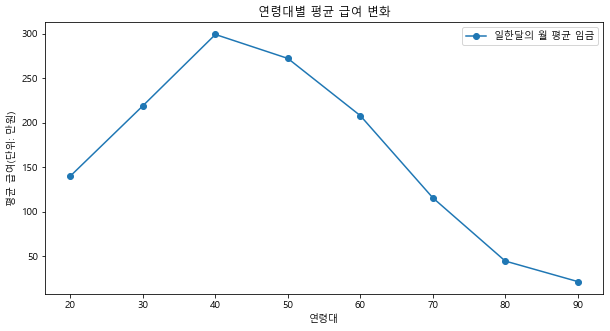

In [110]:
#시각화 
year_salary_subset[['연령대', '일한달의 월 평균 임금']].groupby('연령대').mean().plot(kind='line', rot=0, figsize =(10,5), marker = 'o')



plt.title('연령대별 평균 급여 변화')
plt.xlabel('연령대')
plt.ylabel('평균 급여(단위: 만원)')
plt.legend(loc = 'best')

plt.show()
plt.close()


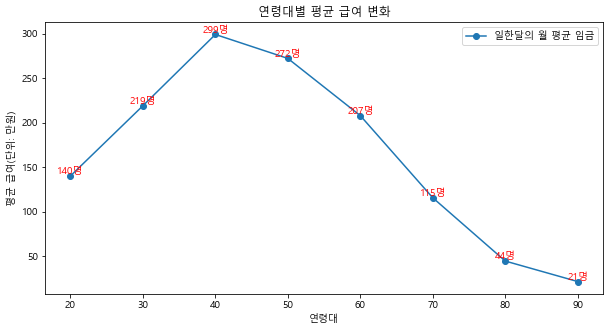

In [116]:
visualization_frm = year_salary_subset[['연령대', '일한달의 월 평균 임금']].groupby('연령대').mean()
visualization_frm.plot(kind='line', rot=0, figsize =(10,5), marker = 'o')

for idx, value in enumerate(list( visualization_frm['일한달의 월 평균 임금'] )) :
    txt = '%d명' % value
    
    plt.text(visualization_frm.index[idx], value, txt , 
            horizontalalignment='center',
            verticalalignment='bottom',
            fontsize=10,
            color='red')
    

plt.title('연령대별 평균 급여 변화')
plt.xlabel('연령대')
plt.ylabel('평균 급여(단위: 만원)')
plt.legend(loc = 'best')

plt.show()
plt.close()
